<a href="https://colab.research.google.com/github/PhaTanVu/AI_24-02/blob/main/DC%C4%91i%E1%BB%81uch%E1%BB%89nhnhi%E1%BB%87t%C4%91%E1%BB%99.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install -U scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 36.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894086 sha256=95eb019fdccb489462ca092f705006cf50a4013552b0336ff6b5296a9b15b6be
  Stored in directory: /root/.cache/pip/wheels/32/2c/a1/a90a7d7dd8448ec029f298a61f3490275e99b17aa348be675c
Successfully built scikit-fuzzy


<ipython-input-3-11706c46f5c9>:54: UserWarning: The following kwargs were not used by contour: 'offet', 'anpha'
  cset = ax.contourf(x, y, z, zdir = 'z', offet = 9, cmap = 'viridis', anpha = 0.5)
<ipython-input-3-11706c46f5c9>:55: UserWarning: The following kwargs were not used by contour: 'offet', 'anpha'
  cset = ax.contourf(x, y, z, zdir = 'x', offet = 11, cmap = 'viridis', anpha = 0.5)
<ipython-input-3-11706c46f5c9>:56: UserWarning: The following kwargs were not used by contour: 'offet', 'anpha'
  cset = ax.contourf(x, y, z, zdir = 'y', offet = 11, cmap = 'viridis', anpha = 0.5)


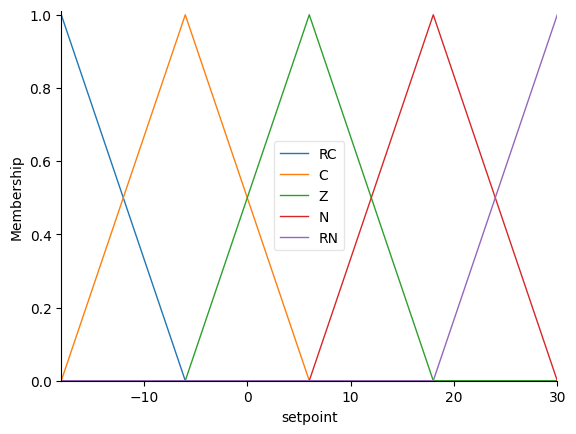

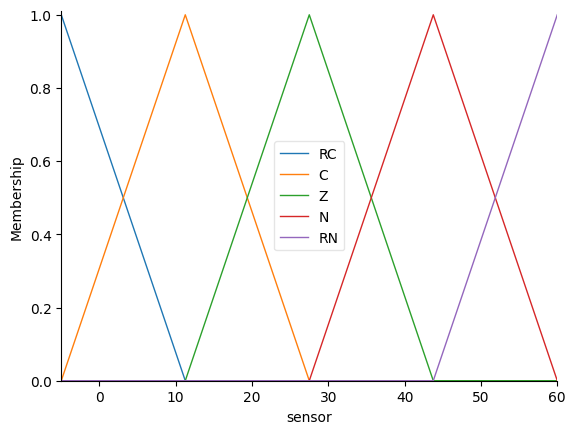

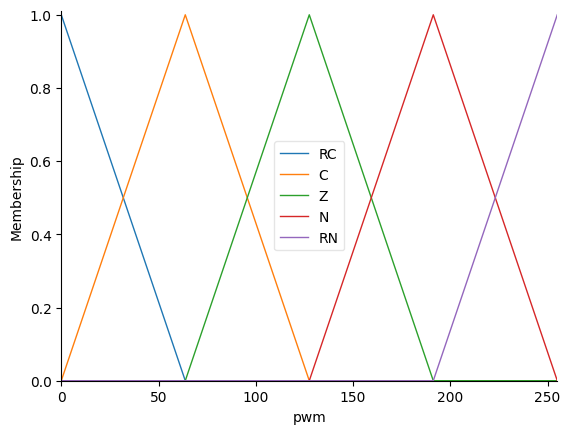

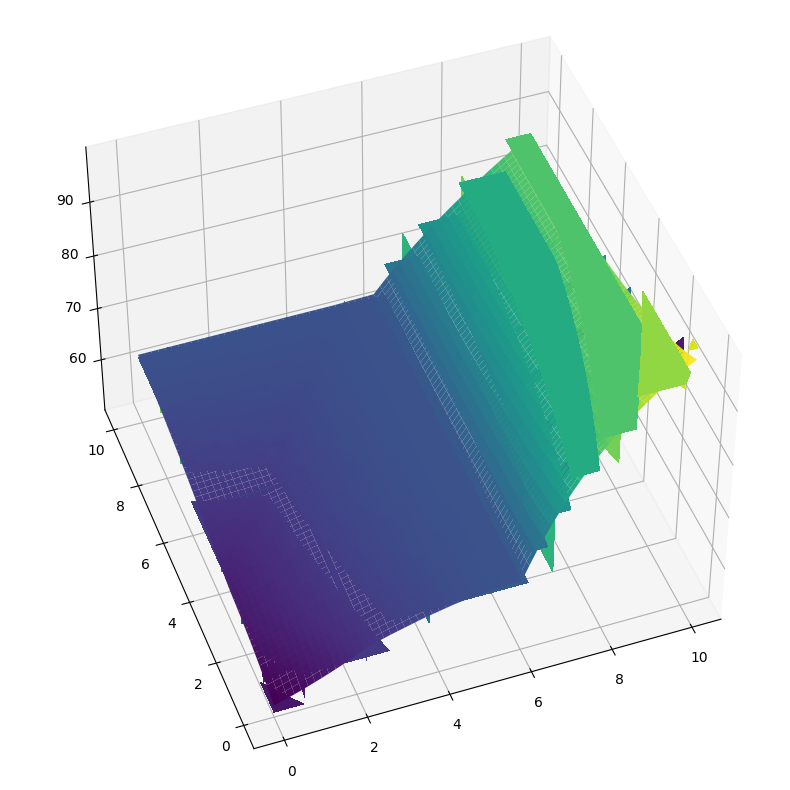

In [3]:
from IPython.utils.process import system
from matplotlib.pyplot import triplot
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

setpoint = np.linspace(-18,30,61) # chia khoang 0-10 thanhf 61 phaanf thuw
sensor= np.linspace(-5,60,61)
pwm = np.linspace(0,255,61)

setpoint= ctrl.Antecedent(setpoint,'setpoint')
sensor = ctrl.Antecedent(sensor,'sensor')
pwm = ctrl.Consequent(pwm,'pwm')

names = ['RC','C','Z','N','RN'] # gia tri phai laf ler 
setpoint.automf(names=names) # chia khoan cho tung bieeur ddofo teen dg bieu do
sensor.automf(names=names)
pwm.automf(names=names)

setpoint.view()
sensor.view()
pwm.view()

rule0 = ctrl.Rule(antecedent=((setpoint['RC']&sensor['RC'])|(setpoint['RC']&sensor['C'])|(setpoint['C']&sensor['RC'])),consequent=pwm['RC'], label= 'rule RC') 

rule1 = ctrl.Rule(antecedent=((setpoint['RC']&sensor['Z'])|(setpoint['C']&sensor['C'])|(setpoint['C']&sensor['Z'])|(setpoint['RC']&sensor['RC'])
|(setpoint['Z']&sensor['C'])),consequent=pwm['C'], label= 'rule C') 

rule2 = ctrl.Rule(antecedent=((setpoint['RC']&sensor['N'])|(setpoint['RC']&sensor['RN'])|(setpoint['C']&sensor['N'])
|(setpoint['C']&sensor['RN'])|(setpoint['Z']&sensor['Z'])|(setpoint['N']&sensor['RC'])|(setpoint['N']&sensor['C'])|(setpoint['RN']&sensor['RC'])|(setpoint['RN']&sensor['C'])),consequent=pwm['Z'], label= 'rule Z') 

rule3 = ctrl.Rule(antecedent=((setpoint['Z']&sensor['N'])|(setpoint['Z']&sensor['RN'])|(setpoint['N']&sensor['Z'])|(setpoint['N']&sensor['N'])
|(setpoint['RN']&sensor['Z'])),consequent=pwm['N'], label= 'rule N') 

rule4 = ctrl.Rule(antecedent=((setpoint['N']&sensor['RN'])|(setpoint['RN']&sensor['N'])|(setpoint['RN']&sensor['RN'])),consequent=pwm['RN'], label= 'rule RN') 

system = ctrl.ControlSystem(rules=[rule0,rule1,rule2, rule3, rule4])
sim = ctrl.ControlSystemSimulation(system, flush_after_run= 61*61+1)
upsampled = np.linspace(00,10,61)
x,y = np.meshgrid(upsampled,upsampled)
z= np.zeros_like(x)
for i in range(61):
  for j in range(61):
    sim.input['setpoint'] = x[i,j]
    sim.input['sensor'] = y[i,j]
    sim.compute()
    z[i,j] = sim.output['pwm']
#phaanf hien thi
fig = plt.figure(figsize = (10, 10))
ax = fig.add_subplot(111, projection = '3d') #vị trí tọa độ 1 1 1
suf = ax.plot_surface(x, y, z, rstride = 1, cstride = 1, cmap = 'viridis',
linewidth = 0.4, antialiased = True)
cset = ax.contourf(x, y, z, zdir = 'z', offet = 9, cmap = 'viridis', anpha = 0.5)
cset = ax.contourf(x, y, z, zdir = 'x', offet = 11, cmap = 'viridis', anpha = 0.5)
cset = ax.contourf(x, y, z, zdir = 'y', offet = 11, cmap = 'viridis', anpha = 0.5)
ax.view_init(45,250)